<a href="https://colab.research.google.com/github/Pavithrabalusu/CarbonEmission_Project/blob/main/Carbon_Emission_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

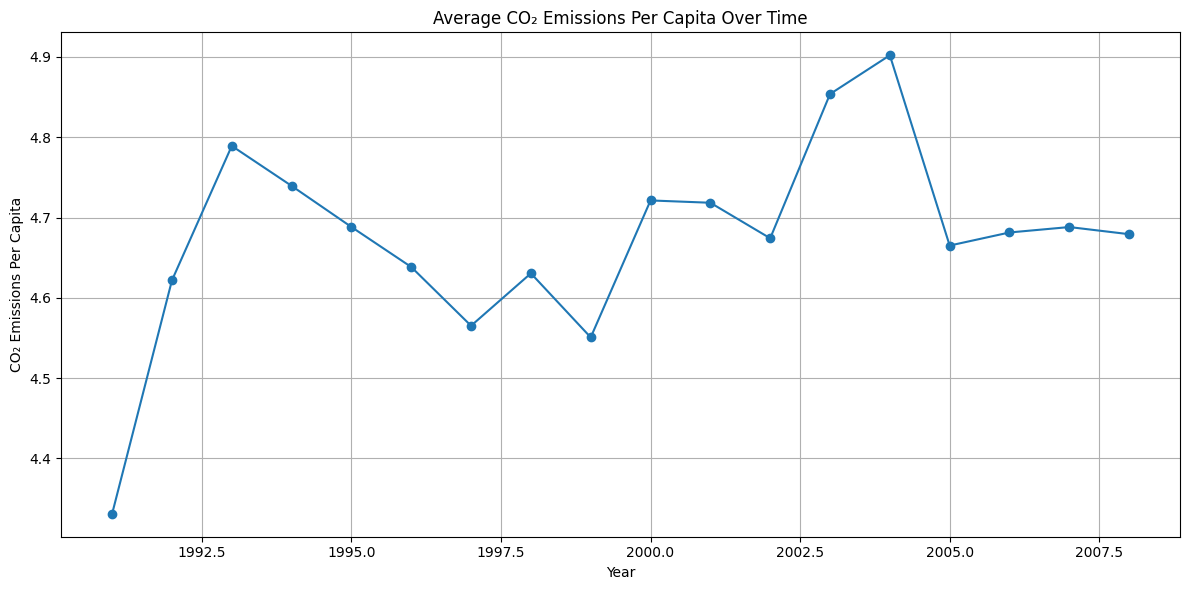

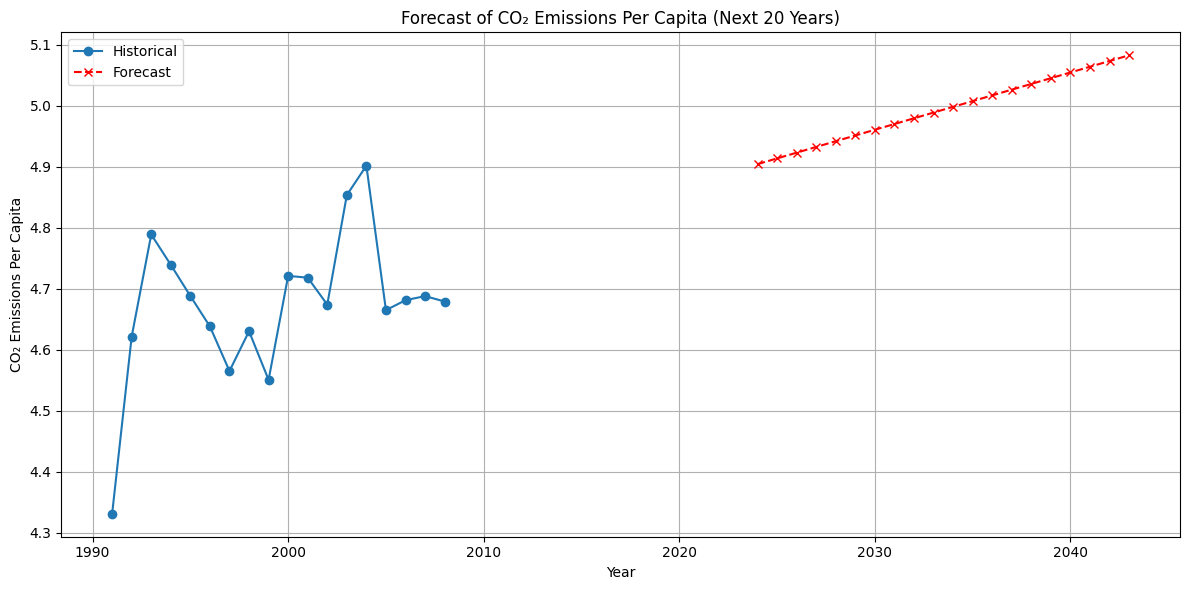

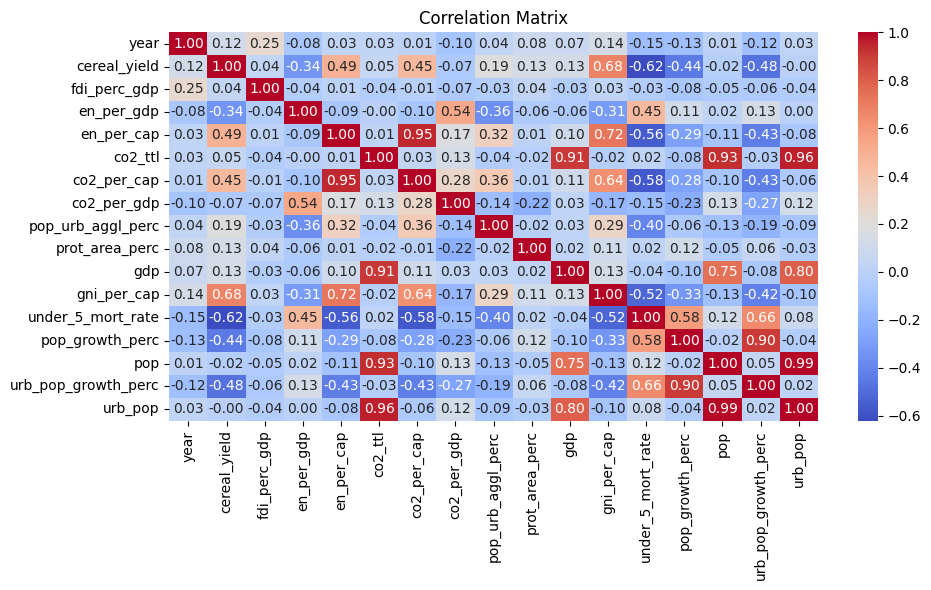

📊 MAE (Mean Absolute Error): 0.209
📈 R² Score: 0.991


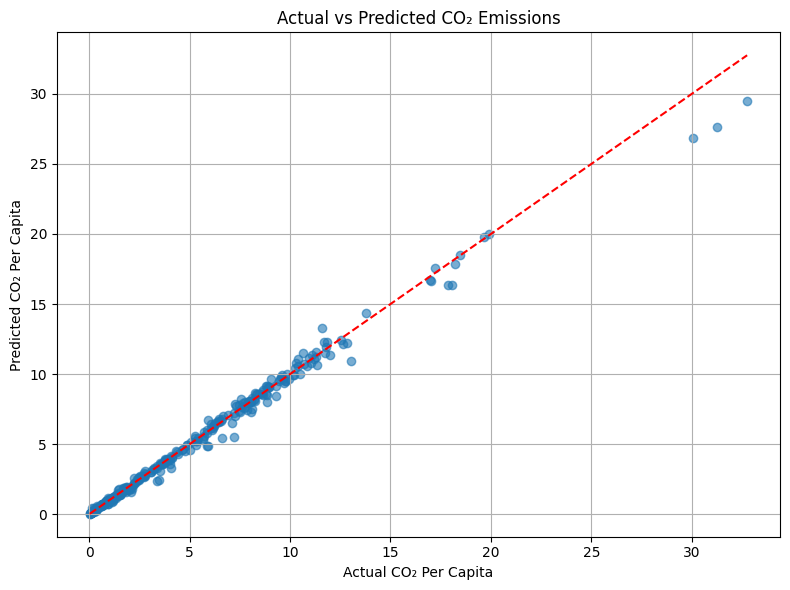

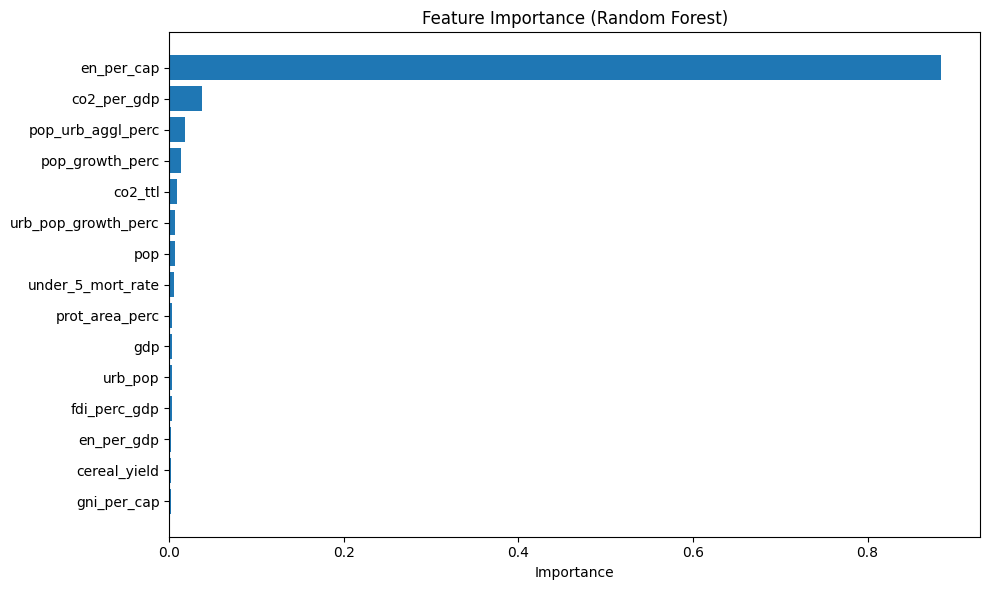

In [5]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 📥 Load Data
df = pd.read_csv("data_cleaned.csv")

# 📈 Plot 1: CO2 Per Capita Trend for Entire Dataset
plt.figure(figsize=(12, 6))
avg_co2_by_year = df.groupby("year")["co2_per_cap"].mean()
plt.plot(avg_co2_by_year.index, avg_co2_by_year.values, marker='o')
plt.title("Average CO₂ Emissions Per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions Per Capita")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔮 Forecasting with Linear Regression
df_trend = df.groupby("year")["co2_per_cap"].mean().reset_index()
X_year = df_trend[["year"]]
y_co2 = df_trend["co2_per_cap"]

# Train linear regression
lr_model = LinearRegression()
lr_model.fit(X_year, y_co2)

# Predict next 20 years
future_years = pd.DataFrame({"year": np.arange(2024, 2044)})
future_preds = lr_model.predict(future_years)

# 📈 Plot 2: CO₂ Forecast (Linear Regression)
plt.figure(figsize=(12, 6))
plt.plot(X_year["year"], y_co2, label="Historical", marker='o')
plt.plot(future_years["year"], future_preds, label="Forecast", linestyle='--', marker='x', color='red')
plt.title("Forecast of CO₂ Emissions Per Capita (Next 20 Years)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions Per Capita")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot 3: Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.drop(columns=["country"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 🎯 Step: Prediction Model with Random Forest
X = df.drop(columns=["co2_per_cap", "country", "year"])
y = df["co2_per_cap"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# 🧮 Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"📊 MAE (Mean Absolute Error): {mae:.3f}")
print(f"📈 R² Score: {r2:.3f}")

# 📊 Plot 4: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual CO₂ Per Capita")
plt.ylabel("Predicted CO₂ Per Capita")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Plot 5: Feature Importance
importances = rf_model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
